# Market Segmetnation

## EDA

In [203]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px  
from sklearn.cluster import KMeans

In [204]:
df = pd.read_csv('social_marketing.csv')
df.head()

,Unnamed: 0,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
0,hmjoe4g3k,2,0,2,2,2,1,1,0,4,...,1,0,1,1,0,11,0,0,0,0
1,clk1m5w8s,3,3,2,1,1,1,4,1,2,...,0,0,0,1,4,0,0,0,0,0
2,jcsovtak3,6,3,4,3,1,5,0,2,1,...,0,1,0,1,0,0,1,0,0,0
3,3oeb4hiln,1,5,2,2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,fd75x1vgk,5,2,0,6,1,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0


In [205]:
df.iloc[:, 1:].sum().sort_values(ascending = False)

chatter             34671
photo_sharing       21256
health_nutrition    20235
cooking             15750
politics            14098
sports_fandom       12564
travel              12493
college_uni         12213
current_events      12030
personal_fitness    11524
food                11015
shopping            10951
online_gaming        9528
news                 9502
religion             8634
tv_film              8436
fashion              7855
parenting            7262
family               6809
automotive           6541
uncategorized        6408
outdoors             6169
school               6051
art                  5713
dating               5603
beauty               5558
music                5354
computers            5116
sports_playing       5038
home_and_garden      4104
crafts               4066
eco                  4038
business             3336
adult                3179
small_business       2651
spam                   51
dtype: int64

In [206]:
#I want to see correlations between categories
correlations = df.iloc[:, 1:].corr()

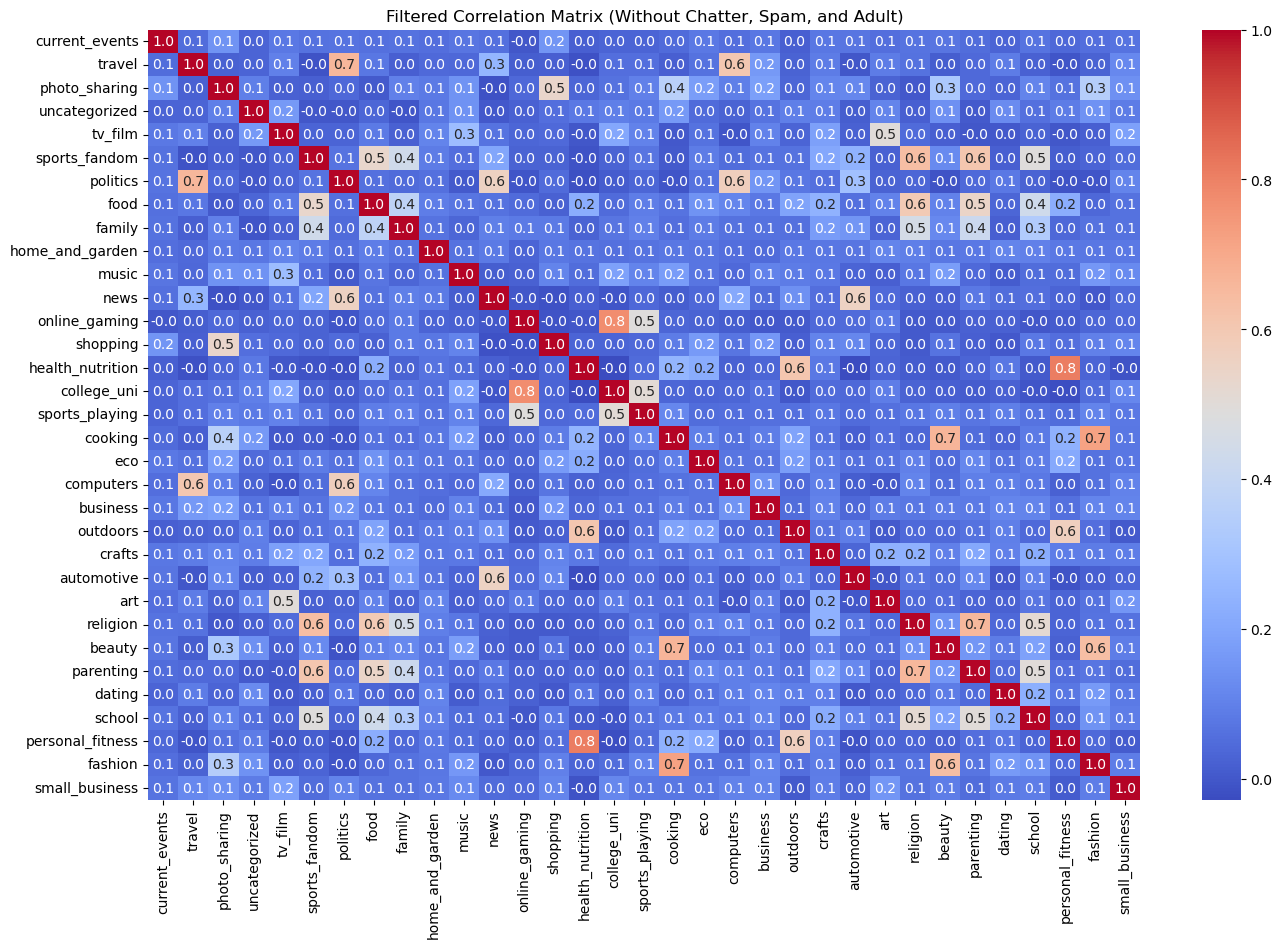

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop the 'chatter', 'spam', and 'adult' columns
df_filtered = df.drop(columns=['chatter', 'spam', 'adult'])

# Calculate the correlation matrix without these categories
correlations_filtered = df_filtered.iloc[:, 1:].corr()

# Display the filtered correlation matrixprint(correlations_filtered)

# Visualize the filtered correlation matrix
plt.figure(figsize=(16, 10))
sns.heatmap(correlations_filtered, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Filtered Correlation Matrix (Without Chatter, Spam, and Adult)')
plt.show()

In [208]:
len(df)

7882

In [209]:
columns_to_sum = [
    "chatter", "current_events", "travel", "photo_sharing", "uncategorized",
    "tv_film", "sports_fandom", "politics", "food", "family", "home_and_garden",
    "music", "news", "online_gaming", "shopping", "health_nutrition", 
    "college_uni", "sports_playing", "cooking", "eco", "computers", 
    "business", "outdoors", "crafts", "automotive", "art", "religion", 
    "beauty", "parenting", "dating", "school", "personal_fitness", "fashion",
    "small_business", "spam", "adult"
]

df['total_tweets'] = df[columns_to_sum].sum(axis=1)
df['total_tweets'].mean()

41.33494037046435

In [210]:
# Calculate the combined percentage of 'spam' and 'adult' tweets
df['spam_adult_chatter_percentage'] = (df['spam'] + df['adult'] + df["chatter"]) / df['total_tweets']

#filter
filter_condition = df['spam_adult_chatter_percentage'] < 0.5
df_filtered = df[filter_condition]

#drop temporary columns
df = df_filtered.drop(columns=['total_tweets', 'spam_adult_chatter_percentage'])
len(df)

7855

## PCA 

In [212]:
#prep the data
pca_data = df.drop(columns=['Unnamed: 0']) 
pca_data_scaled = scaler.fit_transform(pca_data)

#PCA
pca = PCA(n_components=2)  # Start with 2 components for visualization purposes
pca_components = pca.fit_transform(pca_data_scaled)

explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each principal component: {explained_variance}")

Explained variance by each principal component: [0.12425219 0.08019136]


In [213]:
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

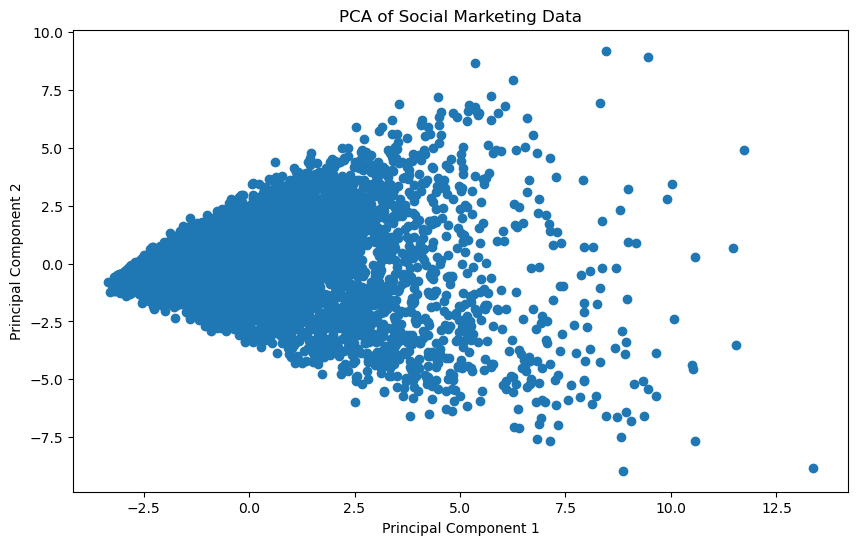

In [214]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Social Marketing Data')
plt.show()

In [215]:
# Get the loadings
loadings = pca.components_

loading_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=pca_data.columns)

loading_df_sorted = loading_df.sort_values(by='PC1', ascending=False)
print("Top influences on PC1:")
print(loading_df_sorted[['PC1']])

Top influences on PC1:
                       PC1
religion          0.298013
food              0.297555
parenting         0.295104
sports_fandom     0.288466
school            0.281669
family            0.244654
beauty            0.201399
crafts            0.193560
cooking           0.188304
fashion           0.183695
photo_sharing     0.179996
eco               0.144933
computers         0.142714
outdoors          0.141762
personal_fitness  0.136743
business          0.135337
shopping          0.132865
automotive        0.131117
politics          0.129408
sports_playing    0.129395
chatter           0.128494
news              0.126877
music             0.123631
health_nutrition  0.123209
small_business    0.118543
travel            0.115866
home_and_garden   0.115341
dating            0.104793
art               0.097214
current_events    0.096733
tv_film           0.096353
uncategorized     0.093763
college_uni       0.093073
online_gaming     0.072873
adult             0.029595
spam 

In [229]:
loading_df_sorted_pc2 = loading_df.sort_values(by='PC2', ascending=False)
print("\nTop influences on PC2:")
print(loading_df_sorted_pc2[['PC2']])


Top influences on PC2:
                       PC2
cooking           0.314789
photo_sharing     0.304046
fashion           0.280355
shopping          0.210566
beauty            0.209265
chatter           0.198763
uncategorized     0.146630
health_nutrition  0.146525
personal_fitness  0.144689
music             0.144400
college_uni       0.115598
outdoors          0.113741
sports_playing    0.108397
business          0.099076
small_business    0.094337
eco               0.085619
online_gaming     0.083189
tv_film           0.079024
dating            0.071715
current_events    0.064429
art               0.060183
home_and_garden   0.046877
travel            0.039796
computers         0.037200
politics          0.013597
spam             -0.004116
adult            -0.005006
crafts           -0.021357
automotive       -0.031354
news             -0.036448
family           -0.195671
school           -0.196566
food             -0.237181
parenting        -0.294116
religion         -0.315362
spor

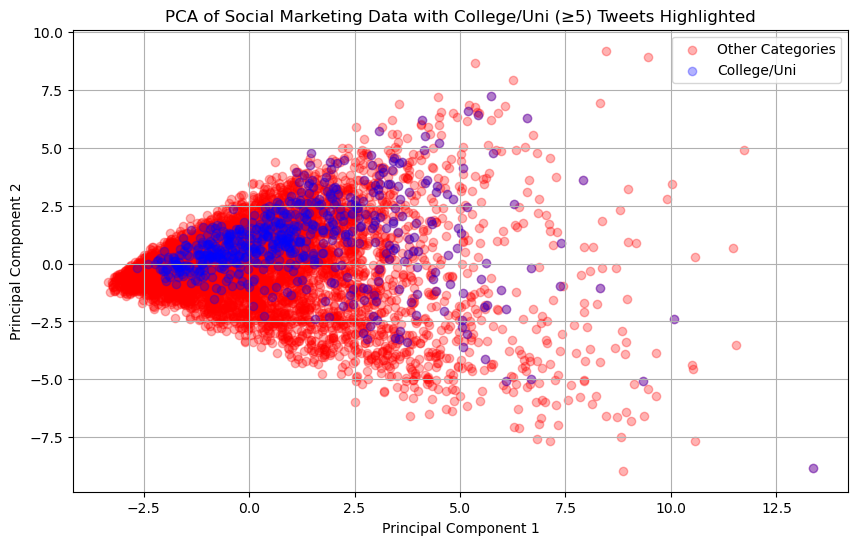

In [231]:
import matplotlib.pyplot as plt
import numpy as np

#over 5 college tweets
college_uni_mask = df['college_uni'] > 5
plt.figure(figsize=(10, 6))

#plot
plt.scatter(pca_components[:, 0], pca_components[:, 1], c='red', marker='o', label='Other Categories', alpha=0.3)

# Highlight points with 'college_uni' tweets
plt.scatter(pca_components[college_uni_mask, 0], pca_components[college_uni_mask, 1], c='blue', marker='o', label='College/Uni', alpha=0.3)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Social Marketing Data with College/Uni (≥5) Tweets Highlighted')

plt.legend()

plt.grid(True)
plt.show()

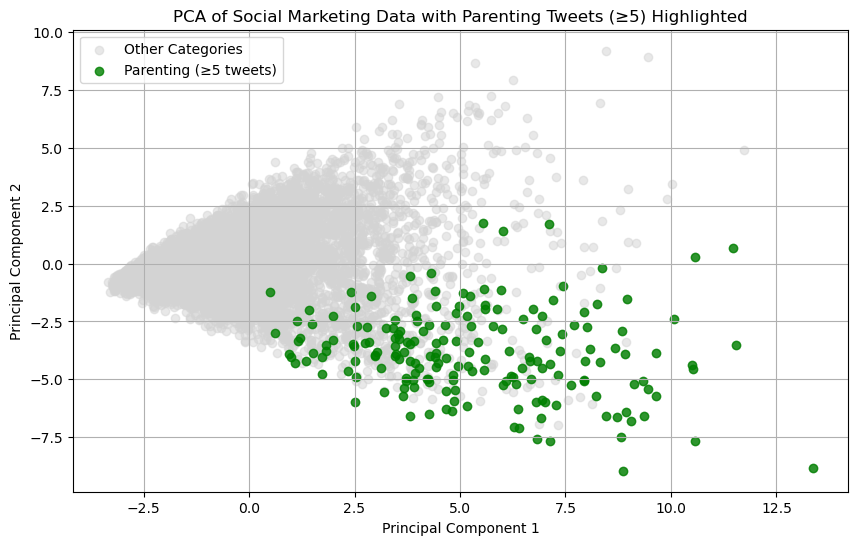

In [237]:
# over 5 parent tweets
parenting_mask = df['parenting'] > 5
plt.figure(figsize=(10, 6))

# Plot
plt.scatter(pca_components[:, 0], pca_components[:, 1], c='lightgray', marker='o', alpha=0.5, label='Other Categories')

# Highlight points with at least 5 parenting tweets
plt.scatter(pca_components[parenting_mask, 0], pca_components[parenting_mask, 1], c='green', marker='o', alpha=0.8, label='Parenting (≥5 tweets)')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Social Marketing Data with Parenting Tweets (≥5) Highlighted')

plt.legend()

plt.grid(True)
plt.show()

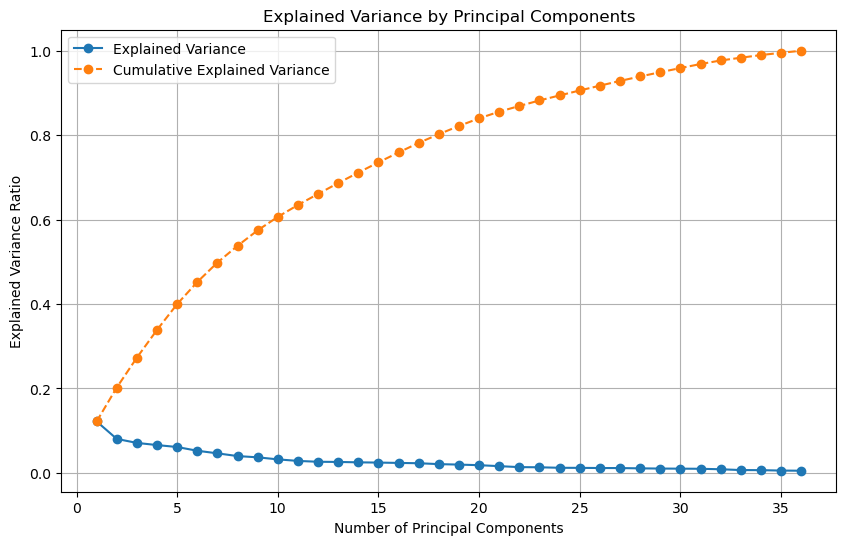

In [110]:
#lets see how pca with different numbers of components does
pca = PCA()
pca.fit(pca_data_scaled)

explained_variance = pca.explained_variance_ratio_

cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label='Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', label='Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend()
plt.grid(True)
plt.show()

## K Means Clustering

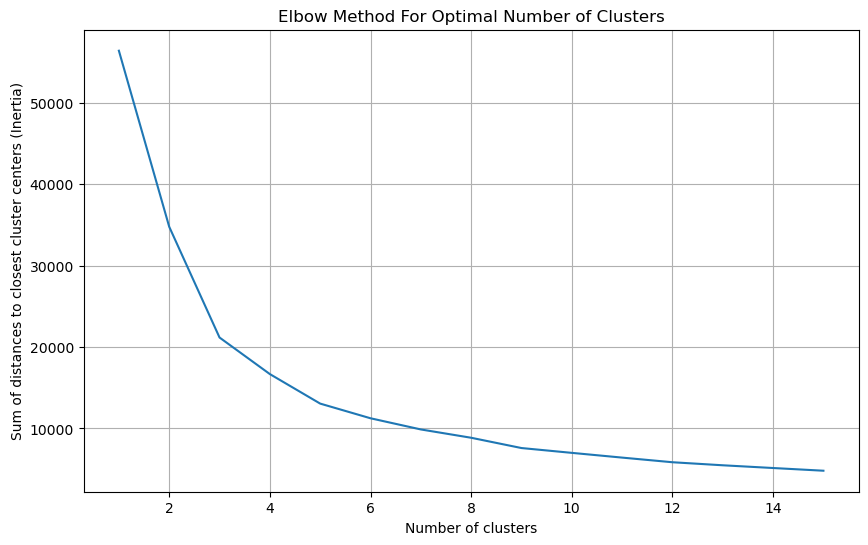

In [125]:
from pandas import Series

X = pca_components

# Step 1: Determine the optimal number of clusters using the elbow method
sum_of_distances = {}
for num_clusters in range(1, 16):
    kmeans = KMeans(n_clusters=num_clusters, random_state=1)
    kmeans.fit(X)
    sum_of_distances[num_clusters] = kmeans.inertia_

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
Series(sum_of_distances).sort_index().plot()
plt.xlabel('Number of clusters')
plt.ylabel('Sum of distances to closest cluster centers (Inertia)')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.grid(True)
plt.show()

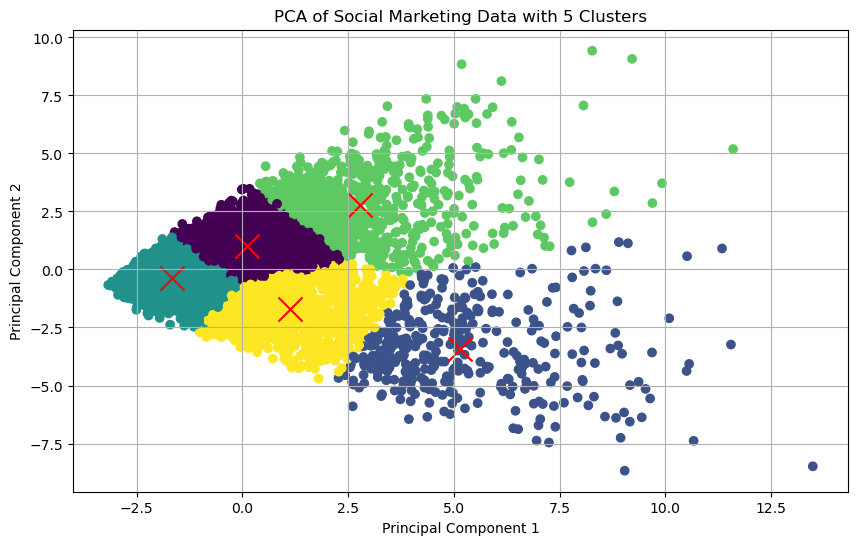

In [133]:
optimal_clusters = 5 
kmeans = KMeans(n_clusters=optimal_clusters, random_state=1)
kmeans.fit(X)
cluster_centers = kmeans.cluster_centers_

#plot
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', marker='x')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'PCA of Social Marketing Data with {optimal_clusters} Clusters')
plt.grid(True)
plt.show()